In [2]:
import numpy as np
import modred as mr
import os
import matplotlib
matplotlib.use('TkAgg')  # Specify the backend
import matplotlib.pyplot as plt
from matplotlib import cm

import data_analysis
import importlib
importlib.reload(data_analysis)

%matplotlib inline

In [3]:
from data_analysis import Simulation
current_directory = '/home/julielimonet/Documents/Stage_M2/'

simulation = Simulation(current_directory)
time, x, z, u, w, T, umean, wmean = simulation.import_data()

simulation.ticks = [-0.04, 0, 0.05, 0.10, 0.15]

In [57]:
print(time[-1])

3.9995285


# $<u(z)>_x (t)$

In [3]:
print(z[0,43 : 48])

[0.85999993 0.87999992 0.89999992 0.91999992 0.93999991]


In [40]:
# print(np.shape(np.mean(u[:,:,43:48], axis = 2)))

uz = np.mean(np.mean(u[:,:,43:48], axis = 2), axis = 1)
# print(np.shape(uz))
# print(np.shape(time))
# print(len(time))
print(f'Intervalle d\'intégration : {z[0,43:48]}')

Intervalle d'intégration : [0.85999993 0.87999992 0.89999992 0.91999992 0.93999991]


In [5]:
uz_mean = np.mean(uz)

In [6]:
from scipy.signal import find_peaks
min_indices = find_peaks(-uz, distance = 50, height = 800)[0]
max_indices = find_peaks(uz, distance = 50, height = -150)[0]

print(len(min_indices))
print(len(max_indices))

19
32


In [19]:
print(len(min_indices))

19


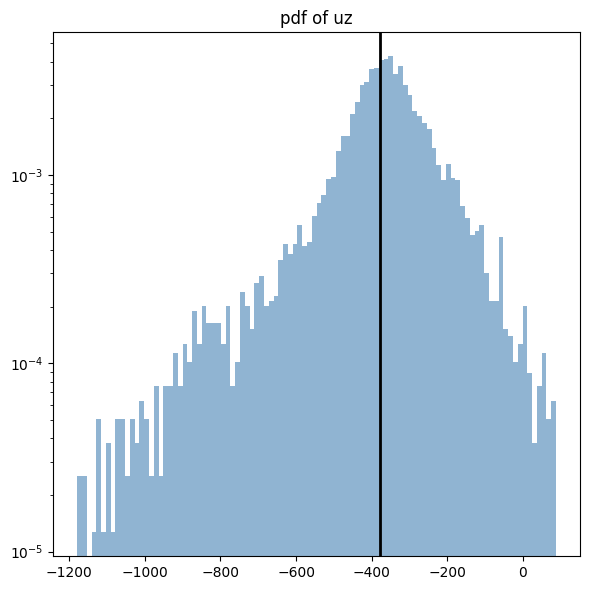

In [54]:
fig, ax = plt.subplots(figsize = (6,6))
ax.hist(uz, bins=100, density=True, alpha=0.6, color='steelblue', histtype = 'bar')
# ax.hist([uz[i] for i in min_indices], bins=20, density=True, alpha=0.6, color='orange',  histtype = 'bar')
ax.set_yscale('log')
ax.axvline(uz_mean, label = 'uzmean', c = 'k', linewidth = 2)
ax.set_title(f'pdf of uz')
plt.tight_layout()
plt.show()


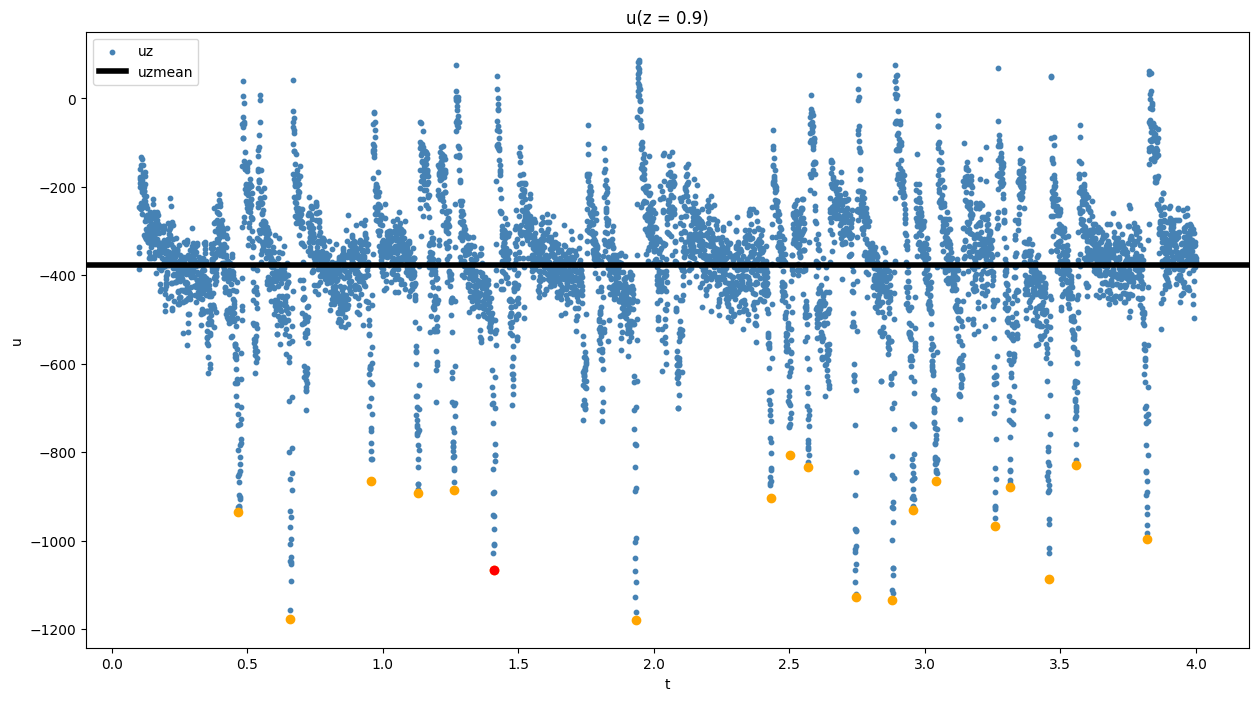

In [48]:
%matplotlib inline
fig,ax = plt.subplots(figsize = (15, 8))
i = 2091

ax.scatter(time, uz, s = 10, c = 'steelblue', label = 'uz')
ax.scatter([time[i] for i in min_indices], [uz[i] for i in min_indices], color = 'orange')
ax.scatter(time[i], uz[i], color = 'red')
# ax.scatter([time[i] for i in max_indices], [uz[i] for i in max_indices], color = 'deeppink')

ax.axhline(uz_mean, c = 'k', linewidth = 4, label = 'uzmean')
ax.set_title('u(z = 0.9)')
ax.set_ylabel('u')
ax.set_xlabel('t')
ax.legend()
# fig.tight_layout()
plt.show()

In [41]:
print(min_indices)
print(uz[4846])
print(max_indices)

[ 581  892 1369 1647 1859 2091 2924 3728 3844 3954 4230 4442 4570 4709
 5067 5159 5384 5543 5960]
-725.7162370293969
[  13  610  715  909 1385 1662 1795 1877 2116 2253 2645 2743 2950 3005
 3097 3147 3249 3747 3974 4091 4253 4460 4591 4719 4871 5011 5086 5219
 5402 5568 5972 6026]


1369, 1647,  : full swipe


In [ ]:
for t in min_indices:
    fig, ax = plt.subplots(figsize = (15,5))
    ax.streamplot(x.T, z.T, u[t,:,:].T , w[t,:,:].T, color = 'k', arrowsize = 0.7,linewidth = 1)
    cf0 = ax.contourf(x, z, T[t, :, :], levels=20, cmap=cm.Spectral.reversed(), norm=matplotlib.colors.Normalize(vmin=T.min(), vmax=T.max()))
    cbar = plt.colorbar(cf0, ax=ax, shrink=0.35, aspect = 6, ticks = [-0.04, 0, 0.05, 0.10, 0.15])
    cbar.ax.set_aspect('auto') 
    ax.set_title(f'Quiver plot at t = {t}')
    ax.set_aspect('equal')
    ax.set_ylim(0,1)
    ax.set_xlim(-4,4)
    plt.tight_layout()
    plt.show()

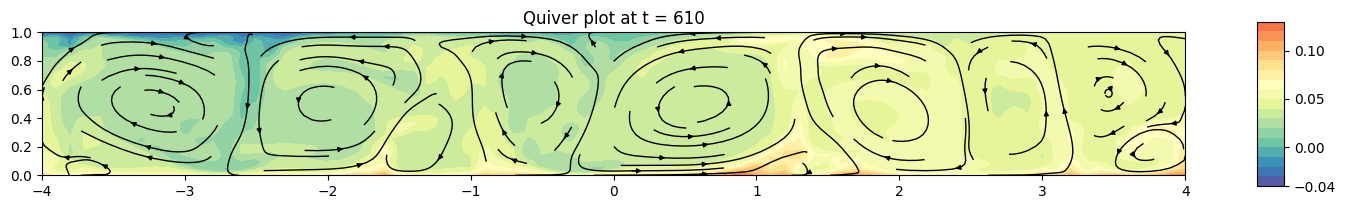

In [52]:
%matplotlib inline
t = 610
fig, ax = plt.subplots(figsize = (15,5))
ax.streamplot(x.T, z.T, u[t,:,:].T , w[t,:,:].T, color = 'k', arrowsize = 0.7,linewidth = 1)
cf0 = ax.contourf(x, z, T[t, :, :], levels=20, cmap=cm.Spectral.reversed(), norm=matplotlib.colors.Normalize(vmin=T.min(), vmax=T.max()))
cbar = plt.colorbar(cf0, ax=ax, shrink=0.35, aspect = 6, ticks = [-0.04, 0, 0.05, 0.10, 0.15])
cbar.ax.set_aspect('auto') 
ax.set_title(f'Quiver plot at t = {t}')
ax.set_aspect('equal')
ax.set_ylim(0,1)
ax.set_xlim(-4,4)
plt.tight_layout()
plt.show()

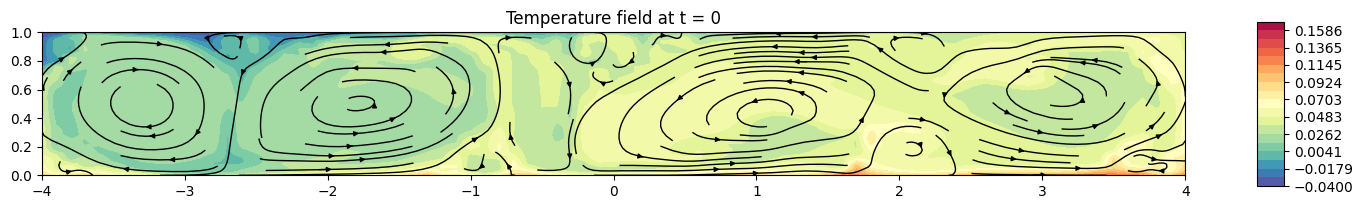

In [121]:
simulation.plot_T_field(0)

In [139]:
simulation.save_clip(2600, 3200, '/home/julielimonet/Documents/Stage_M2/results/data_analysis/')

In [3]:
import cv2
import os

video_name = 'T_field.avi'
image_folder = '/home/julielimonet/Documents/Stage_M2/results/data_analysis/'
images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
images.sort()
img = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = img.shape

fps = 25
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # You can also use other codecs like MJPG, X264, etc.
video = cv2.VideoWriter(video_name, fourcc, fps, (width, height))  # Adjust the frame rate (fps) as needed

# Loop through the images and add them to the video
for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

# Release the video object
video.release()